In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
k = 10;

N = 2000 ## time steps
nEpisode = 1000
SelectedActions = np.zeros((N,nEpisode))
Reward = np.zeros((N,nEpisode))
OptimalAction = np.zeros(nEpisode)
epsilon = 0.1



In [ ]:
for e in range(0,nEpisode):
  qs = np.random.randn(k)
  OptimalAction[e] = np.argmax(qs)
  Q = np.zeros(k)
  Counter = np.zeros(k)
  for t in range(0,N):
    max_ = max(Q)
    A = random.choice([j for j in range(len(Q)) if Q[j] == max_])
    # Exploration
    if np.random.rand() < epsilon:
      A =  np.random.randint(k)
    SelectedActions[t,e] = A
    Counter[A] = Counter[A]+1
    Reward[t,e] = qs[A] + np.random.randn(1)
    Q[A] = Q[A] + 1/Counter[A]*(Reward[t,e] - Q[A])
  #print('Episode (',e,'/',nEpisode,')')
AverageReward = Reward.mean(axis=1)
OAP = np.zeros((N,nEpisode))
for e in range(0,nEpisode):
  OAP[:,e] = SelectedActions[:,e] == OptimalAction[e]
AverageOAP = OAP.mean(axis=1)
#print('Optimal Action Percent = ' , OAP*100,'%')

Text(0.5, 1.0, 'e-Greegy Optimal Selected Actions')

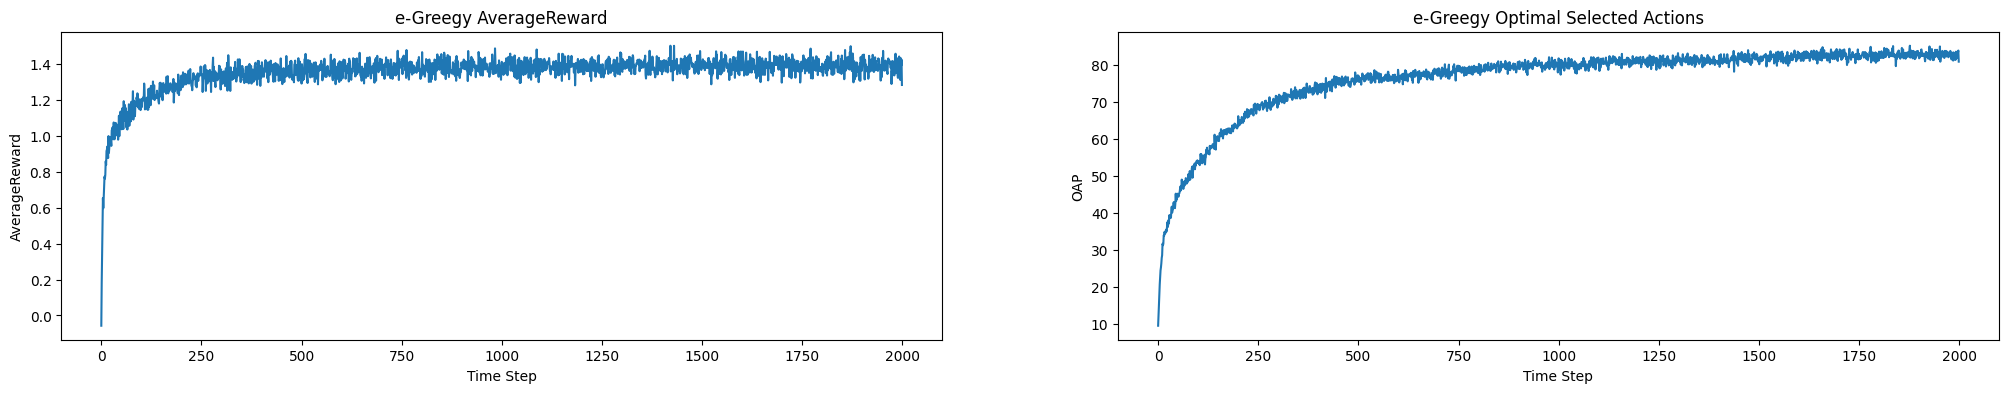

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1, 2, 1)
plt.plot(range(0,N),AverageReward)
plt.xlabel('Time Step')
plt.ylabel('AverageReward')
plt.title('e-Greegy AverageReward')

plt.subplot(1, 2, 2)
plt.plot(range(0,N),AverageOAP*100)
plt.xlabel('Time Step')
plt.ylabel('OAP')
plt.title('e-Greegy Optimal Selected Actions' )
#sns.relplot(x=range(0,N), y=Reward, kind="line")